In [1]:
import numpy as np
import pandas as pd
import sklearn

In [3]:
print(np.__version__)
print(pd.__version__)

1.19.0
1.0.5


In [8]:
df = pd.read_csv("data//nvd.csv")
df.head(10)

,Unnamed: 0,id,source_db,source_db_id,cna,cvss3_bscore,cvss3_severity,cvss3_impact,cvss3_exploitability,cvss3_attack,...,EOS_product,EOS_version,EOS_date,Type,0day,Today,0day_low_y,0day_upper,Today_low,Today_upper
0,0,0,nvd.nist.gov,CVE-2017-16861,Atlassian,9.8,CRITICAL,5.9,3.9,Network,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,nvd.nist.gov,CVE-2017-1000409,MITRE Corporation,7.0,HIGH,5.9,1.0,Local,...,NaN,NaN,NaN,Software Library,$0-$1k,$0-$1k,0.0,1000.0,0.0,1000.0
2,2,2,nvd.nist.gov,CVE-2017-1000408,MITRE Corporation,7.8,HIGH,5.9,1.8,Local,...,NaN,NaN,NaN,Software Library,$0-$1k,$0-$1k,0.0,1000.0,0.0,1000.0
3,3,3,nvd.nist.gov,CVE-2017-16914,Flexera Software LLC,5.9,MEDIUM,3.6,2.2,Network,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,nvd.nist.gov,CVE-2017-16913,Flexera Software LLC,5.9,MEDIUM,3.6,2.2,Network,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5,nvd.nist.gov,CVE-2017-16912,Flexera Software LLC,5.9,MEDIUM,3.6,2.2,Network,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,6,nvd.nist.gov,CVE-2017-16911,Flexera Software LLC,4.7,MEDIUM,3.6,1.0,Local,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,7,nvd.nist.gov,CVE-2018-6374,MITRE Corporation,6.5,MEDIUM,2.5,3.9,Network,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,8,nvd.nist.gov,CVE-2018-6480,MITRE Corporation,8.8,HIGH,5.9,2.8,Network,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,9,nvd.nist.gov,CVE-2018-6479,MITRE Corporation,7.5,HIGH,3.6,3.9,Network,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.describe()

,Unnamed: 0,id,cvss3_bscore,cvss3_impact,cvss3_exploitability,cvss2_bscore,cvss2_impact,cvss2_exploitability,n_exploits,0day_high,today_low,today_high,incident,0day_low_y,0day_upper,Today_low,Today_upper
count,27471.000000,27471.000000,27471.000000,27471.000000,27471.000000,27471.000000,27471.000000,27471.000000,27471.000000,3353.000000,3389.000000,3389.000000,2169.000000,3369.000000,3369.0,3369.000000,3369.000000
mean,13735.000000,13735.000000,7.339012,4.416301,2.783615,5.749459,5.229668,8.122318,0.131666,24634.059052,3375.627029,8068.161700,1.946519,13223.211636,inf,3538.438706,8420.302760
std,7930.338959,7930.338959,1.612830,1.479722,0.913636,1.888787,2.552895,2.005292,1.286410,26930.853685,4372.583724,9670.596732,2.327816,18106.114904,NaN,4605.882592,10109.008754
min,0.000000,0.000000,1.800000,1.400000,0.100000,1.200000,2.900000,1.200000,0.000000,1000.000000,0.000000,1000.000000,0.000000,0.000000,1000.0,0.000000,1000.000000
25%,6867.500000,6867.500000,6.100000,3.600000,1.800000,4.300000,2.900000,8.000000,0.000000,5000.000000,0.000000,1000.000000,1.000000,2000.000000,5000.0,0.000000,1000.000000
50%,13735.000000,13735.000000,7.500000,3.600000,2.800000,5.000000,4.900000,8.600000,0.000000,25000.000000,2000.000000,5000.000000,2.000000,10000.000000,25000.0,2000.000000,5000.000000
75%,20602.500000,20602.500000,8.800000,5.900000,3.900000,7.200000,6.400000,10.000000,0.000000,25000.000000,5000.000000,10000.000000,2.000000,10000.000000,25000.0,5000.000000,10000.000000
max,27470.000000,27470.000000,10.000000,6.000000,3.900000,10.000000,10.000000,10.000000,123.000000,100000.000000,25000.000000,50000.000000,57.000000,100000.000000,inf,25000.000000,50000.000000


In [12]:
lst = ['id','cvss3_bscore','cvss3_impact','cvss2_bscore','cvss2_impact','n_exploits','date_published','platform']


In [14]:
print(df.columns.intersection(lst))

Index(['id', 'cvss3_bscore', 'cvss3_impact', 'cvss2_bscore', 'cvss2_impact',
       'n_exploits', 'date_published', 'platform'],
      dtype='object')


In [15]:
index = df.columns.intersection(lst)
index


Index(['id', 'cvss3_bscore', 'cvss3_impact', 'cvss2_bscore', 'cvss2_impact',
       'n_exploits', 'date_published', 'platform'],
      dtype='object')

In [19]:
data = df[index]
print(data)

id  cvss3_bscore  cvss3_impact  cvss2_bscore  cvss2_impact  \
0          0           9.8           5.9           7.5           6.4   
1          1           7.0           5.9           6.9          10.0   
2          2           7.8           5.9           7.2          10.0   
3          3           5.9           3.6           7.1           6.9   
4          4           5.9           3.6           7.1           6.9   
...      ...           ...           ...           ...           ...   
27466  27466           5.4           2.7           3.5           2.9   
27467  27467           5.4           2.7           3.5           2.9   
27468  27468           5.4           2.7           3.5           2.9   
27469  27469           5.4           2.7           3.5           2.9   
27470  27470           3.3           1.4           2.1           2.9   

       n_exploits date_published platform  
0               0      1/31/2018      NaN  
1               1      1/31/2018    Linux  
2            

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

0.10.1


In [21]:
sns.pairplot(df[index], height=2.5);
plt.show()

In [24]:
platformiSLinux = df[df['platform']=='Linux']
print(platformiSLinux.shape)


(411, 59)


In [26]:
print(platformiSLinux[index].head(10))

id  cvss3_bscore  cvss3_impact  cvss2_bscore  cvss2_impact  n_exploits  \
1      1           7.0           5.9           6.9          10.0           1   
2      2           7.8           5.9           7.2          10.0           1   
36    36           7.8           5.9           7.2          10.0           1   
55    55           6.1           2.7           4.3           2.9           2   
66    66           8.8           5.9           6.8           6.4           1   
73    73           7.5           3.6           5.0           2.9           1   
109  109           5.4           2.7           3.5           2.9           1   
117  117           6.1           2.7           4.3           2.9           1   
119  119           9.8           5.9           7.5           6.4           2   
139  139           6.1           2.7           5.8           4.9           1   

    date_published platform  
1        1/31/2018    Linux  
2        1/31/2018    Linux  
36       1/31/2018    Linux  
55   

In [31]:
df[index].sort_values(by=['cvss2_bscore','cvss3_bscore'],ascending=False).head(10)

,id,cvss3_bscore,cvss3_impact,cvss2_bscore,cvss2_impact,n_exploits,date_published,platform
67,67,10.0,6.0,10.0,10.0,2,1/29/2018,Hardware
1380,1380,10.0,6.0,10.0,10.0,0,2/27/2018,NaN
1825,1825,10.0,6.0,10.0,10.0,1,2/15/2018,Multiple
2835,2835,10.0,6.0,10.0,10.0,0,3/26/2018,NaN
3141,3141,10.0,6.0,10.0,10.0,0,3/19/2018,NaN
6259,6259,10.0,6.0,10.0,10.0,0,5/16/2018,NaN
6260,6260,10.0,6.0,10.0,10.0,0,5/16/2018,NaN
6555,6555,10.0,6.0,10.0,10.0,0,5/9/2018,NaN
6657,6657,10.0,6.0,10.0,10.0,2,5/3/2018,Windows
7859,7859,10.0,6.0,10.0,10.0,0,6/8/2018,NaN


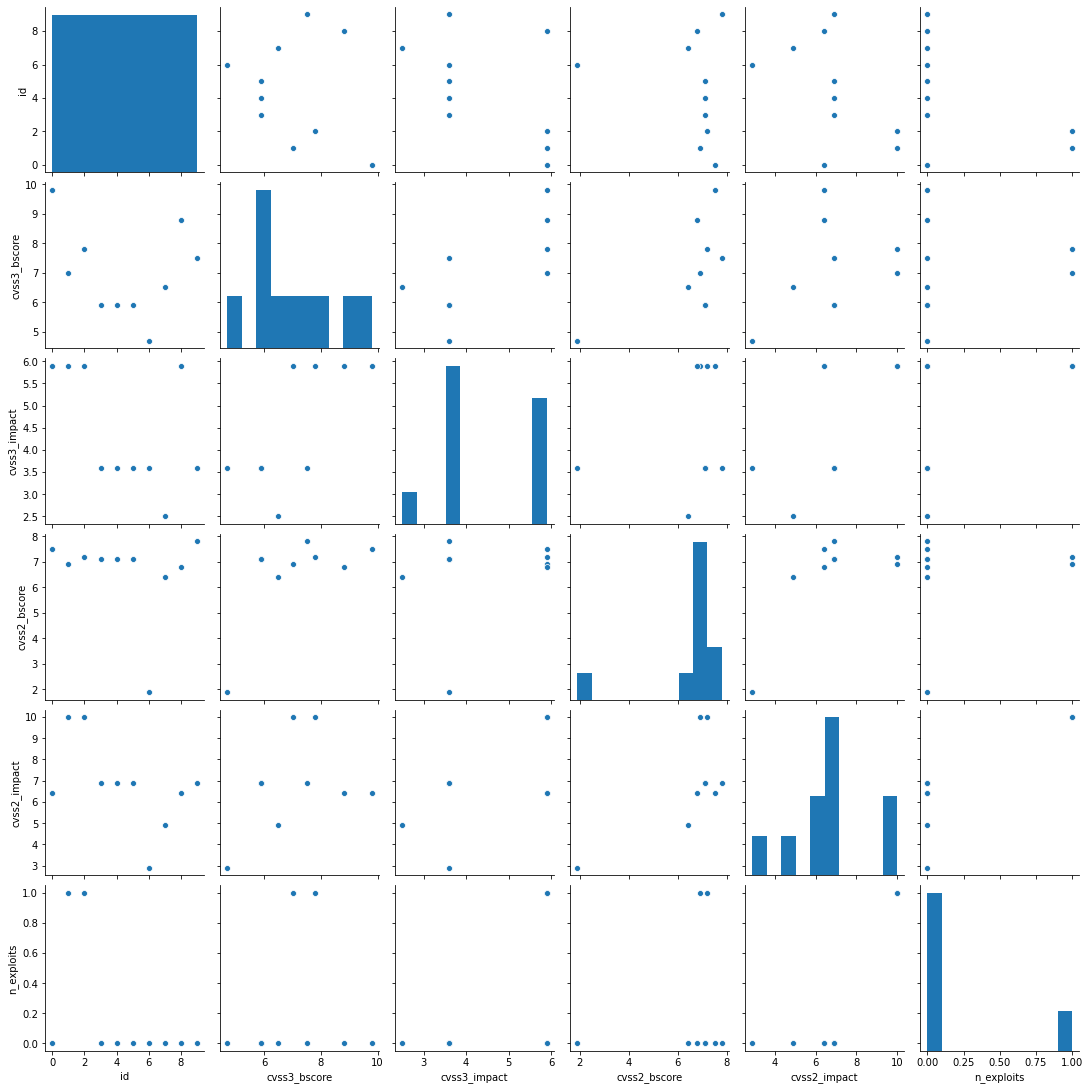

In [33]:
sns.pairplot(df[index].head(10), height=2.5);
plt.show()

In [35]:
pd.options.display.float_format = '{:,.2f}'.format
df.corr()

,Unnamed: 0,id,cvss3_bscore,cvss3_impact,cvss3_exploitability,cvss2_bscore,cvss2_impact,cvss2_exploitability,n_exploits,0day_high,today_low,today_high,incident,0day_low_y,0day_upper,Today_low,Today_upper
Unnamed: 0,1.00,1.00,-0.02,-0.01,-0.02,-0.02,-0.02,-0.01,-0.02,0.12,0.15,0.16,-0.02,0.12,0.13,0.16,0.16
id,1.00,1.00,-0.02,-0.01,-0.02,-0.02,-0.02,-0.01,-0.02,0.12,0.15,0.16,-0.02,0.12,0.13,0.16,0.16
cvss3_bscore,-0.02,-0.02,1.00,0.84,0.48,0.74,0.58,0.36,0.01,0.22,0.23,0.23,0.01,0.23,0.22,0.23,0.23
cvss3_impact,-0.01,-0.01,0.84,1.00,-0.06,0.68,0.75,-0.08,0.01,0.29,0.26,0.27,0.08,0.28,0.29,0.26,0.28
cvss3_exploitability,-0.02,-0.02,0.48,-0.06,1.00,0.28,-0.13,0.80,-0.00,-0.08,-0.01,-0.03,-0.08,-0.04,-0.08,-0.02,-0.03
cvss2_bscore,-0.02,-0.02,0.74,0.68,0.28,1.00,0.87,0.33,0.01,0.28,0.23,0.24,0.06,0.26,0.28,0.24,0.25
cvss2_impact,-0.02,-0.02,0.58,0.75,-0.13,0.87,1.00,-0.17,0.02,0.34,0.26,0.27,0.12,0.28,0.33,0.26,0.27
cvss2_exploitability,-0.01,-0.01,0.36,-0.08,0.80,0.33,-0.17,1.00,-0.01,-0.10,-0.05,-0.07,-0.10,-0.05,-0.10,-0.04,-0.06
n_exploits,-0.02,-0.02,0.01,0.01,-0.00,0.01,0.02,-0.01,1.00,0.05,0.02,0.02,0.05,0.05,0.05,0.01,0.01
0day_high,0.12,0.12,0.22,0.29,-0.08,0.28,0.34,-0.10,0.05,1.00,0.73,0.75,0.12,0.85,0.99,0.67,0.70


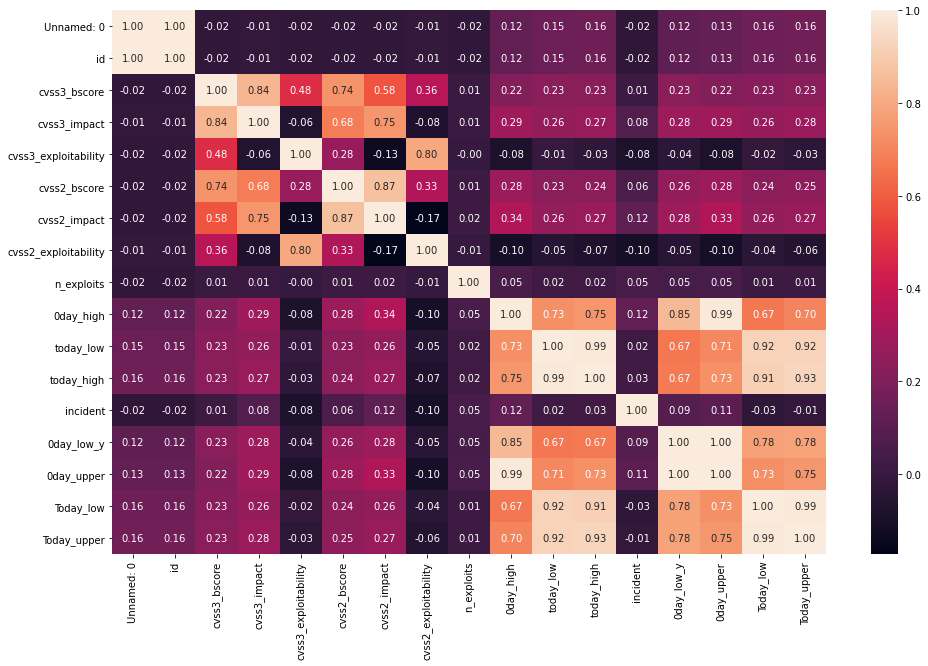

In [36]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

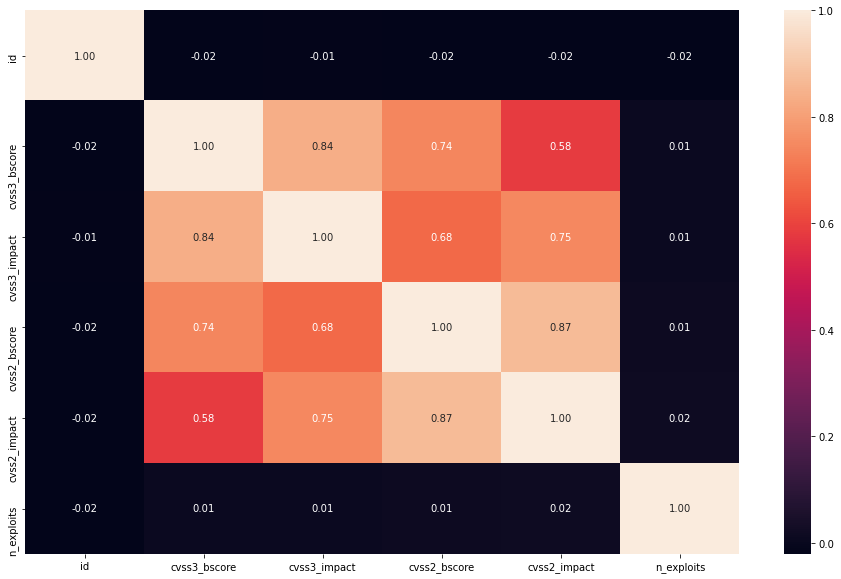

In [37]:
plt.figure(figsize=(16,10))
sns.heatmap(df[index].corr(), annot=True, fmt=".2f")
plt.show()